In [224]:
import pandas as pd

In [245]:
dataset=pd.read_excel("C:/Users/Yaely/Desktop/Proyecto Matematica Discreta/Libro1.xlsx")
dataset.sample(5)

,Nombre,Distancia,Hora_Salida,Hora_num,Dia,Tráfico,Min_8_AM
19,Wilmer,7.9,07:20:00,0.305556,jueves,no,-5
15,cesar,8.0,07:10:00,0.298611,lunes,no,10
22,Andre,10.0,06:50:00,0.284722,miercoles,no,10
24,Paul,10.4,07:00:00,0.291667,miercoles,no,10
10,Cristhian,11.0,06:50:00,0.284722,jueves,no,-5


In [246]:
dataset.dtypes

Nombre          object
Distancia      float64
Hora_Salida     object
Hora_num       float64
Dia             object
Tráfico         object
Min_8_AM         int64
dtype: object

In [247]:
dataset=dataset.drop(['Nombre','Hora_Salida'],axis=1)
dataset['Dia'] = dataset['Dia'].map({'lunes':0,'martes':1,'miercoles':2,'jueves':3,'viernes':4,'sabado':5})
dataset['Tráfico']=dataset['Tráfico'].map({'no':0,'si':1})

In [248]:
var_in=dataset.drop(columns='Min_8_AM')
objetivo=dataset.Min_8_AM

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X_train,X_test,y_train,y_test= train_test_split(var_in,objetivo,test_size=0.2)

In [251]:
from sklearn.tree import DecisionTreeClassifier

In [291]:
model= DecisionTreeClassifier(max_depth=5)

In [284]:
dataset

,Distancia,Hora_num,Dia,Tráfico,Min_8_AM
0,8.3,0.277778,1,0,-10
1,8.3,0.284722,3,1,-10
2,9.0,0.284722,1,1,0
3,9.0,0.288194,4,1,5
4,6.9,0.291667,4,1,-10
5,4.8,0.305556,2,0,10
6,8.1,0.284722,0,1,5
7,7.8,0.291667,3,0,5
8,47.0,0.260417,5,0,-10
9,47.0,0.250000,0,1,10


In [292]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [286]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

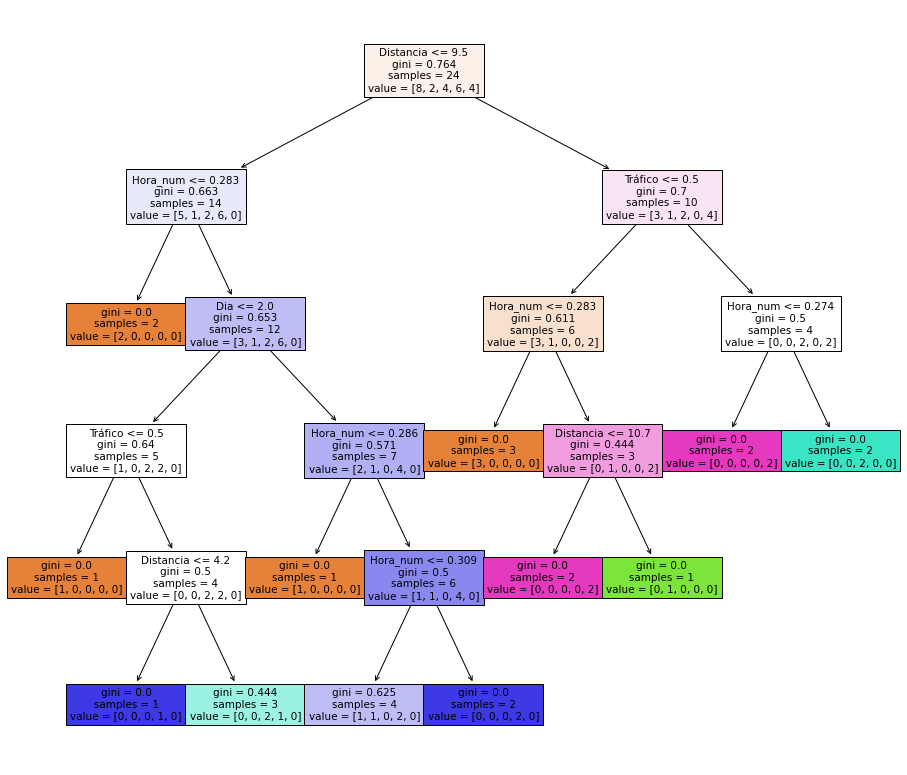

In [293]:
plt.figure(figsize=(16,14))
plot_tree(decision_tree=model, feature_names=var_in.columns,filled=True);

In [294]:
prediccion=model.predict(X_test)

In [271]:
a = X_test.sample()
a

,Distancia,Hora_num,Dia,Tráfico
25,7.9,0.291667,0,1


In [297]:
model.predict(a)

array([0], dtype=int64)

In [296]:
model.score(X_test,y_test)

0.42857142857142855

In [295]:
(prediccion==y_test).sum()/y_test.shape[0]

0.42857142857142855